In [4]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
import json
import PIL
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import shutil


In [7]:
#Citations: this code is given by reboflow to install dataset
!pip install roboflow

rf = Roboflow(api_key="8kwavTW1qD0Xa9lOxX5N")
project = rf.workspace("aps360-project-6tmc3").project("aps360_-2")
dataset = project.version(8).download("coco")


In [73]:
#data preprocessing
def open_coco_file(coco_annots_file_path, ds_type):
    #takes in the file path to a coco annotations and whether the dataset is for train, valid or, test  
    #sorts the images into corresponding folder of their respective classes
    seatbeltCount = 0
    noSeatbeltCount = 0
    img_dest_path = "./"+str(ds_type)
    noSeat_path = os.path.join(img_dest_path, "noSeatbelt")
    seat_path = os.path.join(img_dest_path, "seatbelt")
    
    img_dict = {}
    
    shutil.rmtree(img_dest_path)
    os.mkdir(img_dest_path)
    os.mkdir(seat_path)
    os.mkdir(noSeat_path)
    
    
    with open(os.path.join(coco_annots_file_path,"_annotations.coco.json"), 'r') as f:
            file = json.load(f)
    
    for id in range(len(file['images'])):
        img_path = file['images'][id]['file_name']
        img_dict[id] = {"path": img_path, "labels": []}
    
    for annot in range(len(file['annotations'])):
        img_dict[file['annotations'][annot]["image_id"]]["labels"].append(file['annotations'][annot]['category_id'])
    
    for img_annots in img_dict:
        img_path = img_dict[img_annots]['path']
        label_list = img_dict[img_annots]['labels']
    
        img = os.path.join(coco_annots_file_path,img_path)
        print(img_annots)
        print(label_list)
        if 1 in label_list:
            shutil.copy(img, noSeat_path)
            seatbeltCount += 1
            print("noSeatbelt!")
        else:
            shutil.copy(img, seat_path)
            noSeatbeltCount += 1
            print("seatbelt!")
    print("COCO File opened and parsed")
    print("Number of seatbelt class images: "+str(seatbeltCount))
    print("Number of noSeatbelt class images: "+str(noSeatbeltCount))

In [74]:
coco_train_path = "./APS360_(2)-8/train"
coco_valid_path = "./APS360_(2)-8/valid"
sorted_train_path = "./train"
sorted_val_path = "./valid"

In [75]:
open_coco_file(coco_train_path, "train")

0
[1]
noSeatbelt!
1
[1, 1]
noSeatbelt!
2
[2]
seatbelt!
3
[1]
noSeatbelt!
4
[2]
seatbelt!
5
[1]
noSeatbelt!
6
[1]
noSeatbelt!
7
[1]
noSeatbelt!
8
[2]
seatbelt!
9
[1]
noSeatbelt!
10
[2]
seatbelt!
11
[1]
noSeatbelt!
12
[1]
noSeatbelt!
13
[1]
noSeatbelt!
14
[1]
noSeatbelt!
15
[2]
seatbelt!
16
[1]
noSeatbelt!
17
[2]
seatbelt!
18
[2]
seatbelt!
19
[2]
seatbelt!
20
[2]
seatbelt!
21
[2]
seatbelt!
22
[1]
noSeatbelt!
23
[1]
noSeatbelt!
24
[2]
seatbelt!
25
[2]
seatbelt!
26
[2]
seatbelt!
27
[1]
noSeatbelt!
28
[1]
noSeatbelt!
29
[2]
seatbelt!
30
[1]
noSeatbelt!
31
[2]
seatbelt!
32
[2]
seatbelt!
33
[1]
noSeatbelt!
34
[1]
noSeatbelt!
35
[1]
noSeatbelt!
36
[1]
noSeatbelt!
37
[1]
noSeatbelt!
38
[1]
noSeatbelt!
39
[2]
seatbelt!
40
[2]
seatbelt!
41
[1]
noSeatbelt!
42
[1]
noSeatbelt!
43
[1]
noSeatbelt!
44
[1]
noSeatbelt!
45
[1]
noSeatbelt!
46
[1]
noSeatbelt!
47
[1]
noSeatbelt!
48
[1]
noSeatbelt!
49
[1, 1]
noSeatbelt!
50
[2]
seatbelt!
51
[1]
noSeatbelt!
52
[1]
noSeatbelt!
53
[2]
seatbelt!
54
[2]
seatbelt!
5

noSeatbelt!
530
[1]
noSeatbelt!
531
[2]
seatbelt!
532
[1]
noSeatbelt!
533
[2]
seatbelt!
534
[2, 2]
seatbelt!
535
[2, 2]
seatbelt!
536
[1, 1]
noSeatbelt!
537
[2]
seatbelt!
538
[2]
seatbelt!
539
[1]
noSeatbelt!
540
[2]
seatbelt!
541
[2]
seatbelt!
542
[1]
noSeatbelt!
543
[1]
noSeatbelt!
544
[1]
noSeatbelt!
545
[1]
noSeatbelt!
546
[2]
seatbelt!
547
[2]
seatbelt!
548
[1]
noSeatbelt!
549
[1]
noSeatbelt!
550
[1]
noSeatbelt!
551
[1, 2]
noSeatbelt!
552
[1]
noSeatbelt!
553
[1]
noSeatbelt!
554
[1]
noSeatbelt!
555
[1]
noSeatbelt!
556
[2]
seatbelt!
557
[1]
noSeatbelt!
558
[1]
noSeatbelt!
559
[1]
noSeatbelt!
560
[2]
seatbelt!
561
[1]
noSeatbelt!
562
[2]
seatbelt!
563
[2]
seatbelt!
564
[2, 2]
seatbelt!
565
[2]
seatbelt!
566
[2]
seatbelt!
567
[1]
noSeatbelt!
568
[1]
noSeatbelt!
569
[1]
noSeatbelt!
570
[1]
noSeatbelt!
571
[2]
seatbelt!
572
[2]
seatbelt!
573
[2]
seatbelt!
574
[2]
seatbelt!
575
[]
seatbelt!
576
[1]
noSeatbelt!
577
[1]
noSeatbelt!
578
[2]
seatbelt!
579
[1]
noSeatbelt!
580
[2]
seatbelt!
58

seatbelt!
1023
[2]
seatbelt!
1024
[2, 1]
noSeatbelt!
1025
[1]
noSeatbelt!
1026
[2]
seatbelt!
1027
[1]
noSeatbelt!
1028
[1]
noSeatbelt!
1029
[1]
noSeatbelt!
1030
[1]
noSeatbelt!
1031
[2]
seatbelt!
1032
[2]
seatbelt!
1033
[1]
noSeatbelt!
1034
[1]
noSeatbelt!
1035
[2]
seatbelt!
1036
[1]
noSeatbelt!
1037
[2]
seatbelt!
1038
[2]
seatbelt!
1039
[1]
noSeatbelt!
1040
[1]
noSeatbelt!
1041
[1]
noSeatbelt!
1042
[1]
noSeatbelt!
1043
[1]
noSeatbelt!
1044
[1]
noSeatbelt!
1045
[1]
noSeatbelt!
1046
[2]
seatbelt!
1047
[1]
noSeatbelt!
1048
[2]
seatbelt!
1049
[1]
noSeatbelt!
1050
[]
seatbelt!
1051
[1]
noSeatbelt!
1052
[2]
seatbelt!
1053
[1]
noSeatbelt!
1054
[2]
seatbelt!
1055
[1]
noSeatbelt!
1056
[1]
noSeatbelt!
1057
[1]
noSeatbelt!
1058
[2, 2]
seatbelt!
1059
[2]
seatbelt!
1060
[1]
noSeatbelt!
1061
[1]
noSeatbelt!
1062
[2]
seatbelt!
1063
[1]
noSeatbelt!
1064
[1]
noSeatbelt!
1065
[2]
seatbelt!
1066
[2]
seatbelt!
1067
[1]
noSeatbelt!
1068
[1]
noSeatbelt!
1069
[2]
seatbelt!
1070
[1]
noSeatbelt!
1071
[1]
noSe

seatbelt!
1571
[1]
noSeatbelt!
1572
[1]
noSeatbelt!
1573
[1]
noSeatbelt!
1574
[2, 2]
seatbelt!
1575
[2]
seatbelt!
1576
[2]
seatbelt!
1577
[1]
noSeatbelt!
1578
[1]
noSeatbelt!
1579
[1]
noSeatbelt!
1580
[1]
noSeatbelt!
1581
[2]
seatbelt!
1582
[2]
seatbelt!
1583
[2]
seatbelt!
1584
[1]
noSeatbelt!
1585
[1]
noSeatbelt!
1586
[1, 2]
noSeatbelt!
1587
[1, 1]
noSeatbelt!
1588
[1]
noSeatbelt!
1589
[1]
noSeatbelt!
1590
[2]
seatbelt!
1591
[]
seatbelt!
1592
[1, 1]
noSeatbelt!
1593
[1]
noSeatbelt!
1594
[2]
seatbelt!
1595
[1]
noSeatbelt!
1596
[2]
seatbelt!
1597
[1]
noSeatbelt!
1598
[2]
seatbelt!
1599
[1]
noSeatbelt!
1600
[2]
seatbelt!
1601
[1]
noSeatbelt!
1602
[1]
noSeatbelt!
1603
[]
seatbelt!
1604
[2]
seatbelt!
1605
[2]
seatbelt!
1606
[2]
seatbelt!
1607
[1]
noSeatbelt!
1608
[2]
seatbelt!
1609
[2]
seatbelt!
1610
[2, 2]
seatbelt!
1611
[2]
seatbelt!
1612
[1]
noSeatbelt!
1613
[2]
seatbelt!
1614
[2, 2]
seatbelt!
1615
[1]
noSeatbelt!
1616
[1, 1]
noSeatbelt!
1617
[2]
seatbelt!
1618
[1]
noSeatbelt!
1619
[2]


seatbelt!
1990
[1]
noSeatbelt!
1991
[1]
noSeatbelt!
1992
[2]
seatbelt!
1993
[1]
noSeatbelt!
1994
[2]
seatbelt!
1995
[1]
noSeatbelt!
1996
[1]
noSeatbelt!
1997
[2]
seatbelt!
1998
[1]
noSeatbelt!
1999
[]
seatbelt!
2000
[2]
seatbelt!
2001
[2]
seatbelt!
2002
[]
seatbelt!
2003
[1]
noSeatbelt!
2004
[1]
noSeatbelt!
2005
[1]
noSeatbelt!
2006
[2, 2, 2]
seatbelt!
2007
[2]
seatbelt!
2008
[2]
seatbelt!
2009
[2]
seatbelt!
2010
[1]
noSeatbelt!
2011
[1]
noSeatbelt!
2012
[2]
seatbelt!
2013
[1]
noSeatbelt!
2014
[2]
seatbelt!
2015
[1]
noSeatbelt!
2016
[1]
noSeatbelt!
2017
[1]
noSeatbelt!
2018
[2]
seatbelt!
2019
[2]
seatbelt!
2020
[2, 2]
seatbelt!
2021
[1]
noSeatbelt!
2022
[2]
seatbelt!
2023
[2]
seatbelt!
2024
[2]
seatbelt!
2025
[2]
seatbelt!
2026
[1]
noSeatbelt!
2027
[2]
seatbelt!
2028
[2]
seatbelt!
2029
[1]
noSeatbelt!
2030
[1]
noSeatbelt!
2031
[1]
noSeatbelt!
2032
[1]
noSeatbelt!
2033
[1]
noSeatbelt!
2034
[1]
noSeatbelt!
2035
[2]
seatbelt!
2036
[1]
noSeatbelt!
2037
[1]
noSeatbelt!
2038
[2]
seatbelt!
20

noSeatbelt!
2470
[2]
seatbelt!
2471
[1, 1]
noSeatbelt!
2472
[2]
seatbelt!
2473
[2, 2]
seatbelt!
2474
[2]
seatbelt!
2475
[2]
seatbelt!
2476
[2]
seatbelt!
2477
[1, 2]
noSeatbelt!
2478
[1]
noSeatbelt!
2479
[1]
noSeatbelt!
2480
[1]
noSeatbelt!
2481
[1, 1]
noSeatbelt!
2482
[1]
noSeatbelt!
2483
[1, 1]
noSeatbelt!
2484
[1]
noSeatbelt!
2485
[1]
noSeatbelt!
2486
[1]
noSeatbelt!
2487
[1]
noSeatbelt!
2488
[1]
noSeatbelt!
2489
[2]
seatbelt!
2490
[2]
seatbelt!
2491
[2]
seatbelt!
2492
[2]
seatbelt!
2493
[1]
noSeatbelt!
2494
[1]
noSeatbelt!
2495
[2]
seatbelt!
2496
[1]
noSeatbelt!
2497
[1]
noSeatbelt!
2498
[2]
seatbelt!
2499
[2]
seatbelt!
2500
[2]
seatbelt!
2501
[1]
noSeatbelt!
2502
[2]
seatbelt!
2503
[1]
noSeatbelt!
2504
[2]
seatbelt!
2505
[1]
noSeatbelt!
2506
[1]
noSeatbelt!
2507
[1]
noSeatbelt!
2508
[1, 1]
noSeatbelt!
2509
[2]
seatbelt!
2510
[2]
seatbelt!
2511
[1]
noSeatbelt!
2512
[2]
seatbelt!
2513
[2]
seatbelt!
2514
[2]
seatbelt!
2515
[1, 2]
noSeatbelt!
2516
[2, 1]
noSeatbelt!
2517
[2]
seatbelt!


seatbelt!
2924
[2]
seatbelt!
2925
[2]
seatbelt!
2926
[2]
seatbelt!
2927
[2]
seatbelt!
2928
[1]
noSeatbelt!
2929
[1]
noSeatbelt!
2930
[1]
noSeatbelt!
2931
[2]
seatbelt!
2932
[1, 1]
noSeatbelt!
2933
[1]
noSeatbelt!
2934
[2]
seatbelt!
2935
[1]
noSeatbelt!
2936
[2]
seatbelt!
2937
[2]
seatbelt!
2938
[1]
noSeatbelt!
2939
[2]
seatbelt!
2940
[2]
seatbelt!
2941
[1, 1]
noSeatbelt!
2942
[2]
seatbelt!
2943
[1]
noSeatbelt!
2944
[2]
seatbelt!
2945
[2]
seatbelt!
2946
[1]
noSeatbelt!
2947
[1, 1]
noSeatbelt!
2948
[2]
seatbelt!
2949
[1]
noSeatbelt!
2950
[2]
seatbelt!
2951
[1]
noSeatbelt!
2952
[1, 1]
noSeatbelt!
2953
[1]
noSeatbelt!
2954
[1, 2]
noSeatbelt!
2955
[2]
seatbelt!
2956
[2]
seatbelt!
2957
[2]
seatbelt!
2958
[2, 2]
seatbelt!
2959
[1]
noSeatbelt!
2960
[1]
noSeatbelt!
2961
[1]
noSeatbelt!
2962
[1]
noSeatbelt!
2963
[2, 1]
noSeatbelt!
2964
[1]
noSeatbelt!
2965
[2]
seatbelt!
2966
[2, 2]
seatbelt!
2967
[1]
noSeatbelt!
2968
[2]
seatbelt!
2969
[2]
seatbelt!
2970
[2]
seatbelt!
2971
[1]
noSeatbelt!
2972
[

noSeatbelt!
3401
[2]
seatbelt!
3402
[2]
seatbelt!
3403
[1]
noSeatbelt!
3404
[1]
noSeatbelt!
3405
[2]
seatbelt!
3406
[2]
seatbelt!
3407
[2, 2]
seatbelt!
3408
[2]
seatbelt!
3409
[1]
noSeatbelt!
3410
[2, 2]
seatbelt!
3411
[1, 2]
noSeatbelt!
3412
[2]
seatbelt!
3413
[2]
seatbelt!
3414
[2]
seatbelt!
3415
[1]
noSeatbelt!
3416
[2]
seatbelt!
3417
[1]
noSeatbelt!
3418
[1]
noSeatbelt!
3419
[]
seatbelt!
3420
[1]
noSeatbelt!
3421
[2]
seatbelt!
3422
[2, 1]
noSeatbelt!
3423
[2]
seatbelt!
3424
[1]
noSeatbelt!
3425
[1]
noSeatbelt!
3426
[1]
noSeatbelt!
3427
[1]
noSeatbelt!
3428
[2, 1]
noSeatbelt!
3429
[2]
seatbelt!
3430
[1]
noSeatbelt!
3431
[1]
noSeatbelt!
3432
[2]
seatbelt!
3433
[1]
noSeatbelt!
3434
[2]
seatbelt!
3435
[1]
noSeatbelt!
3436
[1, 1]
noSeatbelt!
3437
[2, 1]
noSeatbelt!
3438
[2]
seatbelt!
3439
[1]
noSeatbelt!
3440
[1]
noSeatbelt!
3441
[1, 2]
noSeatbelt!
3442
[1]
noSeatbelt!
3443
[2]
seatbelt!
3444
[2]
seatbelt!
3445
[2]
seatbelt!
3446
[1]
noSeatbelt!
3447
[1, 2]
noSeatbelt!
3448
[1]
noSeatbe

In [76]:
open_coco_file(coco_valid_path, "valid")

0
[2]
seatbelt!
1
[2]
seatbelt!
2
[2]
seatbelt!
3
[2]
seatbelt!
4
[2]
seatbelt!
5
[2]
seatbelt!
6
[1]
noSeatbelt!
7
[2]
seatbelt!
8
[1]
noSeatbelt!
9
[1]
noSeatbelt!
10
[2]
seatbelt!
11
[2]
seatbelt!
12
[2]
seatbelt!
13
[2]
seatbelt!
14
[2]
seatbelt!
15
[2]
seatbelt!
16
[2]
seatbelt!
17
[2]
seatbelt!
18
[2]
seatbelt!
19
[2]
seatbelt!
20
[1, 2]
noSeatbelt!
21
[2]
seatbelt!
22
[2]
seatbelt!
23
[1]
noSeatbelt!
24
[1]
noSeatbelt!
25
[2, 2]
seatbelt!
26
[1]
noSeatbelt!
27
[2]
seatbelt!
28
[2]
seatbelt!
29
[2]
seatbelt!
30
[2]
seatbelt!
31
[2]
seatbelt!
32
[2]
seatbelt!
33
[2]
seatbelt!
34
[2]
seatbelt!
35
[2]
seatbelt!
36
[1]
noSeatbelt!
37
[2]
seatbelt!
38
[2]
seatbelt!
39
[1]
noSeatbelt!
40
[2]
seatbelt!
41
[1]
noSeatbelt!
42
[2]
seatbelt!
43
[1]
noSeatbelt!
44
[2]
seatbelt!
45
[2, 2]
seatbelt!
46
[2]
seatbelt!
47
[2]
seatbelt!
48
[2]
seatbelt!
49
[2]
seatbelt!
50
[1]
noSeatbelt!
51
[1]
noSeatbelt!
52
[1]
noSeatbelt!
53
[2]
seatbelt!
54
[2]
seatbelt!
55
[2]
seatbelt!
56
[1]
noSeatbelt!
57

seatbelt!
484
[2]
seatbelt!
485
[2]
seatbelt!
486
[1]
noSeatbelt!
487
[2, 2]
seatbelt!
488
[1]
noSeatbelt!
489
[2]
seatbelt!
490
[2]
seatbelt!
491
[2]
seatbelt!
492
[2]
seatbelt!
493
[2]
seatbelt!
494
[2]
seatbelt!
495
[2]
seatbelt!
496
[2]
seatbelt!
497
[2]
seatbelt!
498
[2]
seatbelt!
499
[2]
seatbelt!
500
[1, 1]
noSeatbelt!
501
[1]
noSeatbelt!
502
[2]
seatbelt!
503
[2]
seatbelt!
504
[1]
noSeatbelt!
505
[2]
seatbelt!
506
[2]
seatbelt!
507
[2]
seatbelt!
508
[2]
seatbelt!
509
[2]
seatbelt!
510
[1]
noSeatbelt!
511
[1]
noSeatbelt!
512
[2]
seatbelt!
513
[2]
seatbelt!
514
[2]
seatbelt!
515
[2]
seatbelt!
516
[2]
seatbelt!
517
[2]
seatbelt!
518
[2]
seatbelt!
519
[2]
seatbelt!
520
[2]
seatbelt!
COCO File opened and parsed
Number of seatbelt class images: 127
Number of noSeatbelt class images: 394


In [77]:
transform = transforms.Compose([transforms.Resize((250,250)), 
                                transforms.ToTensor()])

train_dataset = torchvision.datasets.ImageFolder(sorted_train_path, transform=transform)
val_dataset = torchvision.datasets.ImageFolder(sorted_val_path, transform=transform)

In [78]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 3532
    Root location: ./train
    StandardTransform
Transform: Compose(
               Resize(size=(250, 250), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [79]:
val_dataset

Dataset ImageFolder
    Number of datapoints: 521
    Root location: ./valid
    StandardTransform
Transform: Compose(
               Resize(size=(250, 250), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [80]:
train_indices = np.arange(0, len(train_dataset)) 
np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
np.random.shuffle(train_indices)
train_sampler = SubsetRandomSampler(train_indices)

val_indices = np.arange(0, len(val_dataset))
np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
np.random.shuffle(val_indices)
val_sampler = SubsetRandomSampler(val_indices)


In [81]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, num_workers = 1, sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(val_dataset,  batch_size=64, num_workers = 1, sampler=val_sampler)

In [82]:
train_loader  

In [83]:
for images, labels in train_loader:
    print(labels)

tensor([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
tensor([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])
tensor([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,

tensor([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0])
tensor([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])
tensor([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])
tensor([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])
tensor([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,

In [84]:
class BaselineNet(nn.Module):
    def __init__(self):
        super(BaselineNet, self).__init__()
        self.name = "baseline"
        self.conv = nn.Conv2d(3, 5, 5, stride = 2)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(4500, 5 * 7 * 7)
        self.fc2 = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 4500)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [85]:
baseline_model = BaselineNet()

In [86]:
def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cats vs dogs
    target_classes = ["seatbelt", "noSeatbelt"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

In [87]:
train_net(baseline_model)

Epoch 1: Train err: 0.4408267270668177, Train loss: 0.6836944584335599 |Validation err: 0.7562380038387716, Validation loss: nan
Epoch 2: Train err: 0.3873159682899207, Train loss: 0.6548931140984807 |Validation err: 0.7370441458733206, Validation loss: 0.7532305651240878
Epoch 3: Train err: 0.38165345413363533, Train loss: 0.6408943363598415 |Validation err: 0.23032629558541268, Validation loss: 0.5592922369639078
Epoch 4: Train err: 0.31172140430351075, Train loss: 0.5780332290700504 |Validation err: 0.31477927063339733, Validation loss: 0.6105682916111417
Epoch 5: Train err: 0.27095130237825593, Train loss: 0.5312050921576363 |Validation err: 0.3934740882917466, Validation loss: 0.6504017578230964
Epoch 6: Train err: 0.22904869762174404, Train loss: 0.47616923680262907 |Validation err: 0.2591170825335892, Validation loss: 0.49576590789688957
Epoch 7: Train err: 0.13250283125707815, Train loss: 0.31525021445538315 |Validation err: 0.22456813819577734, Validation loss: 0.4842630277077

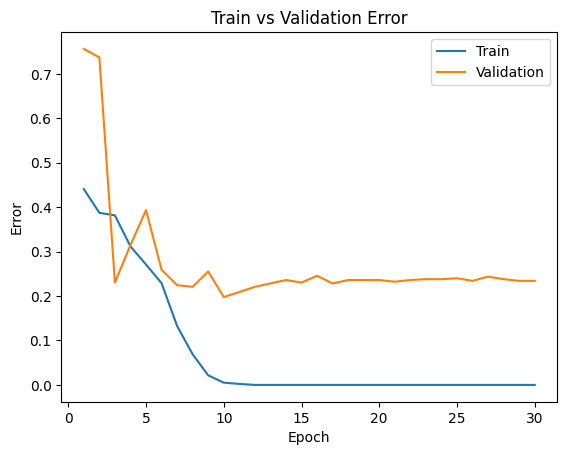

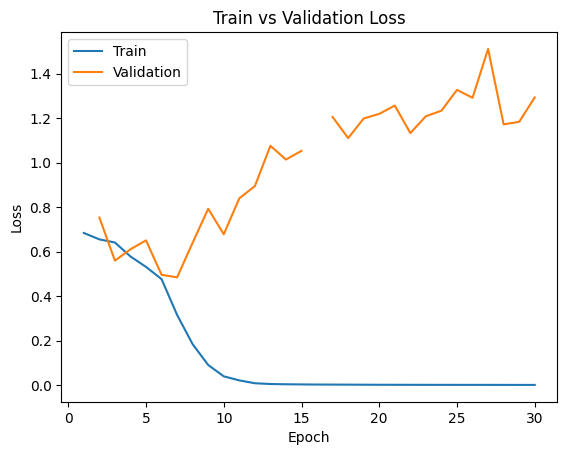

In [88]:
bsln_model_path = get_model_name("baseline", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(bsln_model_path)

In [45]:
rf = Roboflow(api_key="8kwavTW1qD0Xa9lOxX5N")
project = rf.workspace("aps360-project-6tmc3").project("test-set-r5re0")
dataset = project.version(1).download("coco")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Test-Set-1 in coco:: 100%|███████████████████████| 484/484 [00:00<00:00, 1020.76it/s]


In [97]:
coco_test_path = "./Test-Set-1/test"
sorted_test_path = "./test"

open_coco_file(coco_test_path, "test")

test_dataset = torchvision.datasets.ImageFolder(sorted_test_path, transform=transform)

test_indices = np.arange(0, len(test_dataset))
np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
np.random.shuffle(test_indices)
test_sampler = SubsetRandomSampler(test_indices)

0
[2]
seatbelt!
1
[2]
seatbelt!
2
[2]
seatbelt!
3
[2, 1]
noSeatbelt!
4
[1]
noSeatbelt!
5
[2]
seatbelt!
6
[2]
seatbelt!
7
[2]
seatbelt!
8
[1]
noSeatbelt!
9
[1]
noSeatbelt!
10
[1]
noSeatbelt!
11
[1]
noSeatbelt!
12
[2]
seatbelt!
13
[2]
seatbelt!
14
[1]
noSeatbelt!
15
[1]
noSeatbelt!
16
[1]
noSeatbelt!
17
[2]
seatbelt!
18
[1]
noSeatbelt!
19
[2]
seatbelt!
20
[1]
noSeatbelt!
21
[1]
noSeatbelt!
22
[1]
noSeatbelt!
23
[2]
seatbelt!
24
[1]
noSeatbelt!
25
[2]
seatbelt!
26
[1]
noSeatbelt!
27
[2]
seatbelt!
28
[2]
seatbelt!
29
[2]
seatbelt!
30
[1]
noSeatbelt!
31
[1]
noSeatbelt!
32
[2]
seatbelt!
33
[2]
seatbelt!
34
[2]
seatbelt!
35
[2]
seatbelt!
36
[1]
noSeatbelt!
37
[1, 1]
noSeatbelt!
38
[2]
seatbelt!
39
[1]
noSeatbelt!
40
[2]
seatbelt!
41
[1]
noSeatbelt!
42
[1]
noSeatbelt!
43
[1]
noSeatbelt!
44
[2]
seatbelt!
45
[1]
noSeatbelt!
46
[1]
noSeatbelt!
47
[2]
seatbelt!
48
[1]
noSeatbelt!
49
[2]
seatbelt!
50
[2]
seatbelt!
51
[2, 2]
seatbelt!
52
[1]
noSeatbelt!
53
[2]
seatbelt!
54
[1]
noSeatbelt!
55
[2]
sea

seatbelt!
437
[1]
noSeatbelt!
438
[1]
noSeatbelt!
439
[1]
noSeatbelt!
440
[2]
seatbelt!
441
[2]
seatbelt!
442
[2]
seatbelt!
443
[2]
seatbelt!
444
[2, 2]
seatbelt!
445
[2]
seatbelt!
446
[2]
seatbelt!
447
[2]
seatbelt!
448
[1]
noSeatbelt!
449
[2, 2]
seatbelt!
450
[2]
seatbelt!
451
[1]
noSeatbelt!
452
[1]
noSeatbelt!
453
[1]
noSeatbelt!
454
[2]
seatbelt!
455
[2]
seatbelt!
456
[2, 2]
seatbelt!
457
[1]
noSeatbelt!
458
[2]
seatbelt!
459
[2]
seatbelt!
460
[2]
seatbelt!
461
[1]
noSeatbelt!
462
[1]
noSeatbelt!
463
[2]
seatbelt!
464
[1]
noSeatbelt!
465
[2, 1]
noSeatbelt!
466
[2]
seatbelt!
467
[1]
noSeatbelt!
468
[1]
noSeatbelt!
469
[1]
noSeatbelt!
470
[2]
seatbelt!
471
[1]
noSeatbelt!
472
[1]
noSeatbelt!
473
[2]
seatbelt!
474
[1]
noSeatbelt!
475
[2]
seatbelt!
476
[1]
noSeatbelt!
477
[2]
seatbelt!
478
[1]
noSeatbelt!
479
[1]
noSeatbelt!
COCO File opened and parsed
Number of seatbelt class images: 239
Number of noSeatbelt class images: 241


In [98]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 480
    Root location: ./test
    StandardTransform
Transform: Compose(
               Resize(size=(250, 250), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [92]:
test_loader = torch.utils.data.DataLoader(test_dataset,  batch_size=64, num_workers = 1, sampler=test_sampler)

In [96]:
for i, data in test_loader:
    print(i)
    print(data)

IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "C:\Users\charl\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\charl\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\charl\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "C:\Users\charl\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\datasets\folder.py", line 228, in __getitem__
    path, target = self.samples[index]
                   ~~~~~~~~~~~~^^^^^^^
IndexError: list index out of range


In [94]:
criterion = nn.BCEWithLogitsLoss()
testError, testLoss = evaluate(baseline_model, test_loader, criterion)

print("The error rate on the test set is {} and the loss on the test set is {}.".format(testError, testLoss))

IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "C:\Users\charl\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\charl\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\charl\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "C:\Users\charl\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\datasets\folder.py", line 228, in __getitem__
    path, target = self.samples[index]
                   ~~~~~~~~~~~~^^^^^^^
IndexError: list index out of range
